# Milestone 4
## Couette Flow
implementation of a (moving) wall

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from source.algorithms.latticeBoltzman import LatticeBoltzmannMethod 
import source.algorithms.BoundaryCondition as bc
from source.data.ExperimentData import ExperimentVar
import source.data.ExperimentData as ed
import source.data.CommonDefinitions as cd
import matplotlib as mpl

In [2]:
#common data
var = ExperimentVar()
X =  var.lattice_shape[0]
Y =  var.lattice_shape[1]
plt.style.use('classic')
wall_velo = 1.0

## Exercise 1
Plot of the evolution of the velocity profile to the steady state
have two rigid walls

In [3]:
# density_field = np.ones((Y, X))*0.1
# density_field[10:30, 10:30] = 1
# lattice_pdf = LatticeBoltzmannMethod(var.lattice_shape[0],var.lattice_shape[1], omega=var.omega , init_density=density_field, init_plot=True)
# boundary_list =[]

# boundary_list.append(bc.RigidWall(boundaryAlignment=cd.BoundaryAlignments.TOP, lattice=lattice_pdf))
# boundary_list.append(bc.RigidWall(boundaryAlignment=cd.BoundaryAlignments.BOTTOM, lattice=lattice_pdf))
# boundary_list.append(bc.RigidWall(boundaryAlignment=cd.BoundaryAlignments.LEFT, lattice=lattice_pdf))
# boundary_list.append(bc.RigidWall(boundaryAlignment=cd.BoundaryAlignments.RIGHT, lattice=lattice_pdf))
# boundary_handling = bc.BoundaryHandlings(boundary_conditions=boundary_list)
# lattice_pdf.execute(timesteps=var.time_steps, boundary=boundary_handling)
# lattice_pdf.display_animation()
# plt.close()




now have one rigid wall (bottom) and one moving wall (top)


In [4]:
profiles = []
velocities = np.zeros((var.time_steps, Y, X), dtype=np.float64)
velocity_fields = np.zeros((var.time_steps, 2, Y,X), dtype=np.float64)
def callback(lattice: LatticeBoltzmannMethod, t: int) -> None:
    velocities[t] = lattice.getVelocity()[1]
    profiles.append(np.abs(lattice.getVelocity()[0, -1 , 0]))
    velocity_fields[t] = lattice.getVelocity()
density_field, velocity_field = ed.dens1_velo0(grid_shape=var.lattice_shape)

lattice_pdf = LatticeBoltzmannMethod(var.lattice_shape[0],var.lattice_shape[1], omega=var.omega , init_density=density_field, init_velocity=velocity_field, init_plot=False)
boundary_list =[]
boundary_list.append( bc.MovingWall(boundaryAlignment=cd.BoundaryAlignments.TOP, lattice=lattice_pdf, wall_velo=np.array([0, wall_velo])))
boundary_list.append(bc.RigidWall(boundaryAlignment=cd.BoundaryAlignments.BOTTOM, lattice=lattice_pdf))
boundary_handling = bc.BoundaryHandlings(boundary_list)
lattice_pdf.execute(timesteps=var.time_steps, callback=callback, boundary=boundary_handling)
# lattice_pdf.display_animation()
plt.close()

Moving Wall at BoundaryAlignments.TOP
Rigid Wall at BoundaryAlignments.BOTTOM
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000


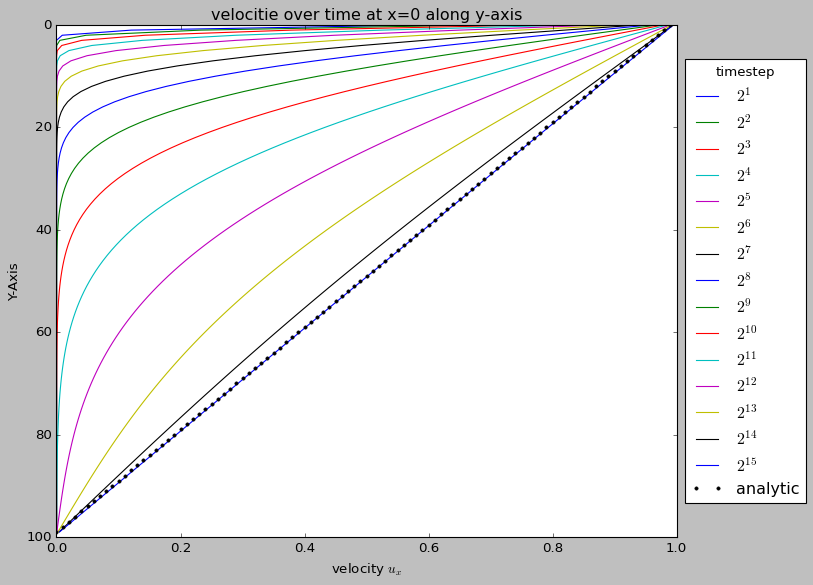

In [5]:
# np.array(profiles).shape
velo_timesteps = np.arange(1,16,1)
y_values = np.arange(0,Y,1)
fig, ax = plt.subplots(figsize=(10,8))
prof = np.array(profiles)
for timestep in velo_timesteps:
    # plt.plot(np.sum(velocities, axis=0)[ timestep, :], range(Y, 0, -1), label=timestep)
    ax.plot(velocities[2**timestep, :, 0], range(0, Y), label="$2^{%i}}$"%timestep)
   
# plt.xlim(-.1, 0.20)
ax.plot((y_values[::-1]*wall_velo/Y), y_values, '.k', label="analytic")
ax.set_xlabel("velocity $u_x$")
ax.set_ylabel("Y-Axis")
ax.set_ylim(Y, 0)
plt.title("velocitie over time at x=0 along y-axis")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="timestep")
plt.savefig(f'figures/Milestone4/CouetteFlow.png', bbox_inches='tight')
plt.show()

## Exercise 2

Plot of the evolution with streamlines

<Figure size 640x480 with 0 Axes>

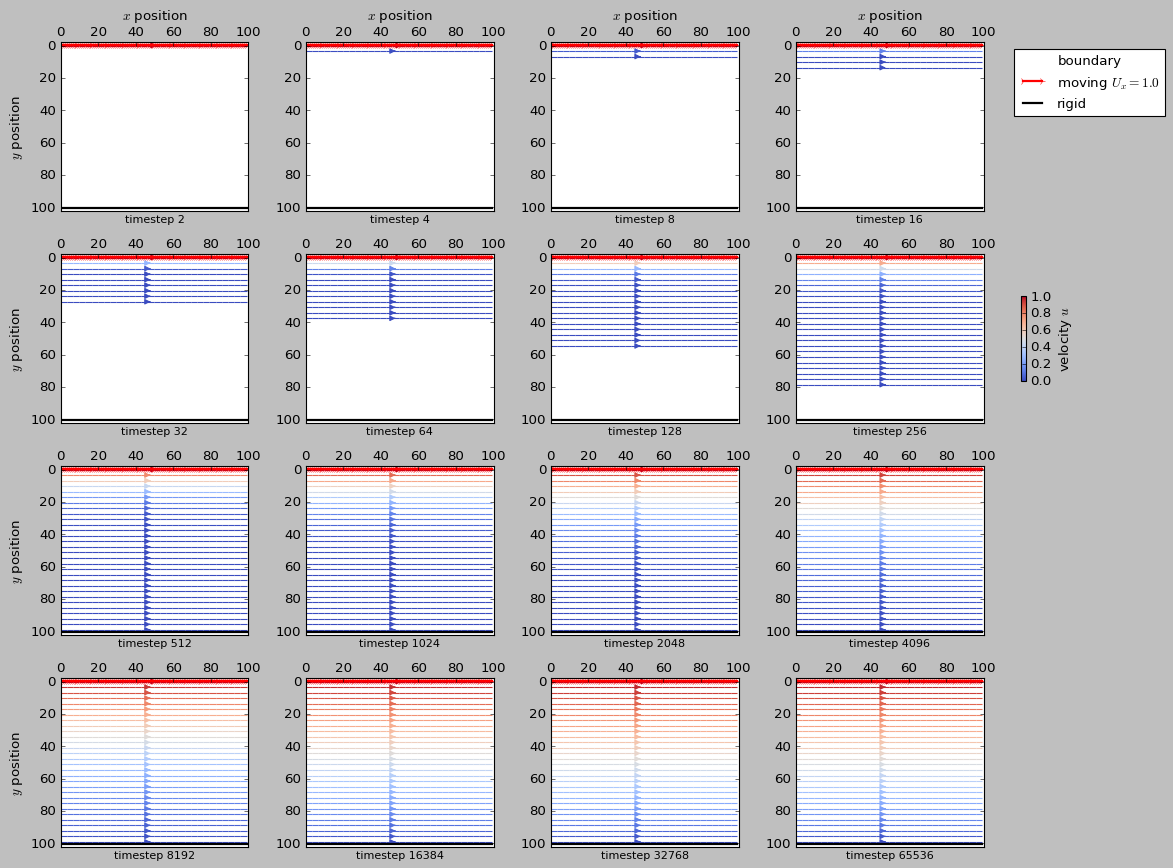

In [6]:
plt.suptitle("streaming at")
rows, columns = 4, 4
fig, ax = plt.subplots(rows, columns, figsize=(15,11))
axis = ax.flatten()
x, y = np.meshgrid(np.arange(X), np.arange(Y))
cmap = "coolwarm"
velo_timesteps = np.arange(1,17,1)
for idx, time in enumerate(velo_timesteps):
    plt.subplot(rows, columns, idx+1)
    plt.title("timestep {}".format(2**time), size=10, y=-0.1)
    plt.xlim(0, X)
    if idx < rows:
        plt.xlabel('$x$ position')
    if idx % rows == 0:
        plt.ylabel('$y$ position')
    plt.ylim(-2, Y+2)
    vy = np.zeros((Y,X))
    vx = velocity_fields[2**time, 1, :, :]
    plt.streamplot(x, y, vx, vy, color=vx, cmap=cmap)
    plt.plot(range(X), np.ones((X))*-0.5, 'r-4', linewidth=2, label="moving $U_x={}$".format(wall_velo))
    plt.plot(range(X), np.ones((X))*(Y+0.5), 'k', linewidth=2, label="rigid")
axis[columns-1].legend(title="boundary", bbox_to_anchor=(2, 1), loc='upper right', prop={'size':12})
for single_axs in axis:
    single_axs.invert_yaxis()
    single_axs.xaxis.tick_top()
    single_axs.xaxis.set_label_position("top")
color_norm = mpl.colors.Normalize(vmin=0.0, vmax=wall_velo)
fig.tight_layout()
p = axis[columns-1+rows].get_position()
fig.colorbar(mpl.cm.ScalarMappable(norm=color_norm, cmap=cmap), \
    ax=fig.add_axes([p.x0+0.055, p.y0,p.width, p.height], visible=False), label='velocity $u$', shrink=0.5)
plt.savefig(f'figures/Milestone4/Streamplot.png', bbox_inches='tight')
plt.show()